# Long Short-Term Memory (LSTM) Using Darts

## What is Darts? 

Darts is a python time series forcasting library. We wanted to see what it can do with its implementation of lstm. How much does it differ from ours? Is it better or worse? what about trainning time? It is generally better to use a library then implement everything by hand. We will be using darts for the upcoming time series forcasting models.

Using darts enables us to test different algorithms faster and to tune parameters faster.

In [1]:
import src.darts__lstm as lstm
import src.framework__test_bench as tb

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.


2022-07-17 22:52:25 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 3172 samples.


[TEST BENCH] Throwing out data that is less than 15.0 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 61
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop


2022-07-17 22:52:25 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-17 22:52:25 pytorch_lightning.utilities.rank_zero INFO: Multiprocessing is handled by SLURM.
2022-07-17 22:52:25 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-07-17 22:52:25 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-17 22:52:25 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-17 22:52:25 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-17 22:52:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:28 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 |

[TEST BENCH] Training took 28.662713289260864 seconds.
[TEST BENCH] Starting testing loop


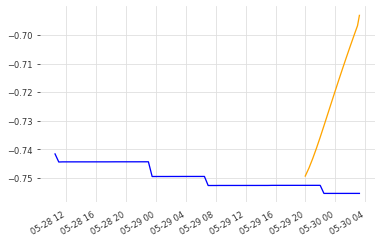

2022-07-17 22:52:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


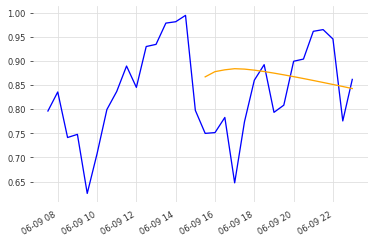

2022-07-17 22:52:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


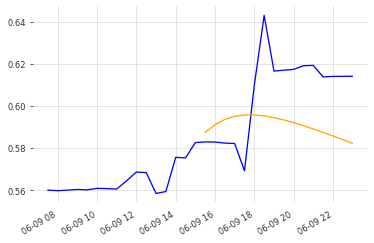

2022-07-17 22:52:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


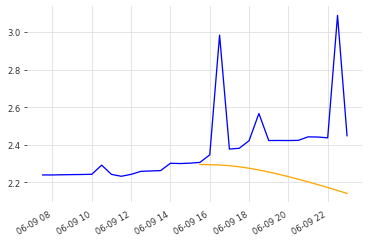

2022-07-17 22:52:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


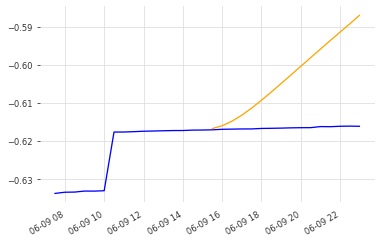

2022-07-17 22:52:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


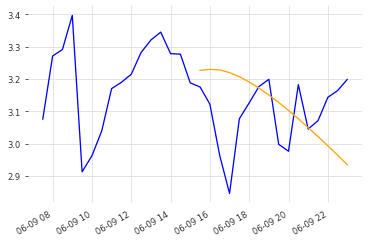

2022-07-17 22:52:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


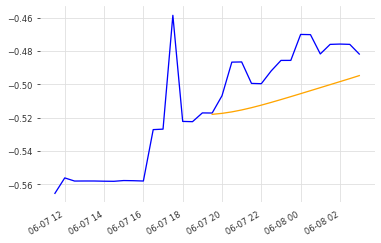

2022-07-17 22:52:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


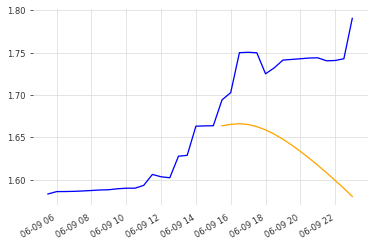

2022-07-17 22:52:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


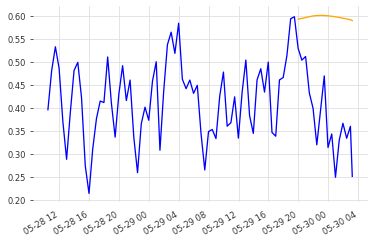

2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


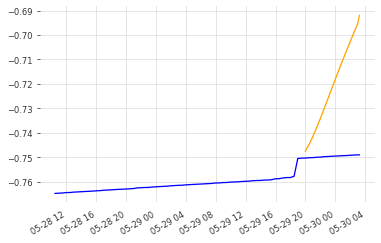

2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             28.662713289260864
[TEST BENCH] Average mse over the test set is        0.0059455241339337675
[TEST BENCH] Average precision over the test set is  0.6548896458732525
[TEST BENCH] Average recall over the test set is     0.76868682319502
[TEST BENCH] Average F1 over the test set is         0.6565973696314978
[TEST BENCH] Average MASE over the test set is       460.2971115976287
[TEST BENCH] Average MAPE over the test set is       12.162063497767248
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 1 m

2022-07-17 22:52:59 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 180 samples.
2022-07-17 22:52:59 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-17 22:52:59 pytorch_lightning.utilities.rank_zero INFO: Multiprocessing is handled by SLURM.
2022-07-17 22:52:59 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-07-17 22:52:59 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-17 22:52:59 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-17 22:52:59 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-17 22:52:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:52:59 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
------------------------------------

[TEST BENCH] Throwing out data that is less than 15.0 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 20
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop


2022-07-17 22:53:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[TEST BENCH] Training took 5.500100612640381 seconds.
[TEST BENCH] Starting testing loop


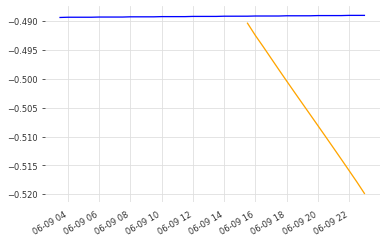

2022-07-17 22:53:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


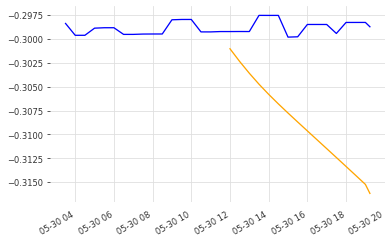

2022-07-17 22:53:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


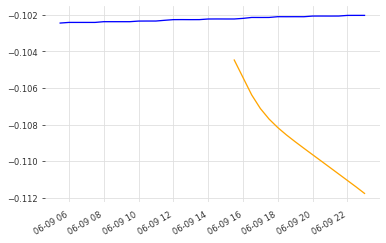

2022-07-17 22:53:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


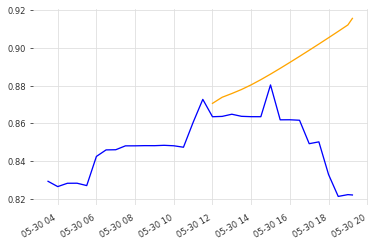

2022-07-17 22:53:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


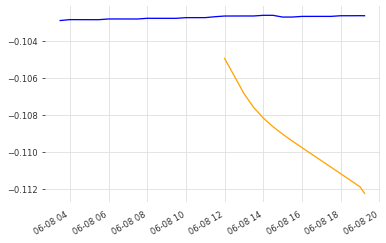

2022-07-17 22:53:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


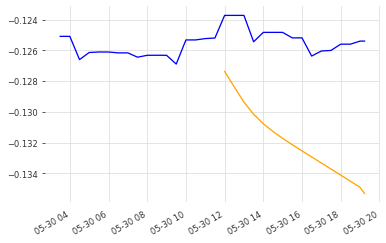

2022-07-17 22:53:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


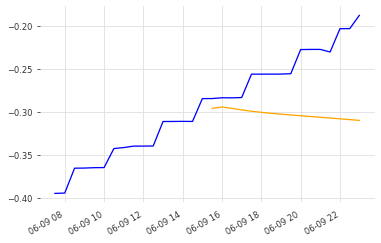

2022-07-17 22:53:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


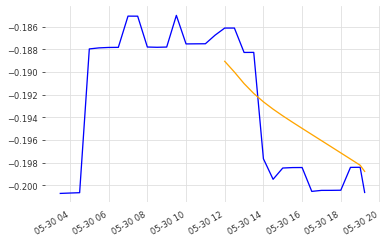

2022-07-17 22:53:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


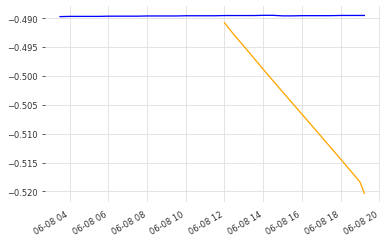

2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


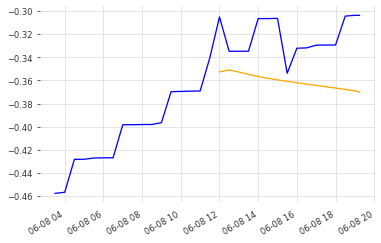

2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             5.500100612640381
[TEST BENCH] Average mse over the test set is        0.0016482445756103245
[TEST BENCH] Average precision over the test set is  0.15
[TEST BENCH] Average recall over the test set is     0.20384615384615384
[TEST BENCH] Average F1 over the test set is         0.1398150762281197
[TEST BENCH] Average MASE over the test set is       288.83222624298764
[TEST BENCH] Average MAPE over the test set is       5.533220369082616
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsampling data from 1 samp

2022-07-17 22:53:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 61628 samples.
2022-07-17 22:53:39 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-17 22:53:39 pytorch_lightning.utilities.rank_zero INFO: Multiprocessing is handled by SLURM.
2022-07-17 22:53:39 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-07-17 22:53:39 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-17 22:53:39 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-17 22:53:39 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-17 22:53:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 22:53:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
----------------------------------

[TEST BENCH] Training took 513.0830686092377 seconds.
[TEST BENCH] Starting testing loop


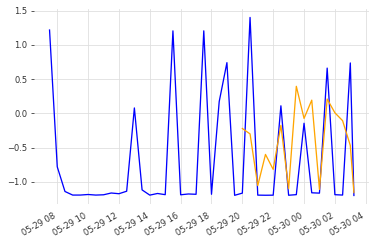

2022-07-17 23:02:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


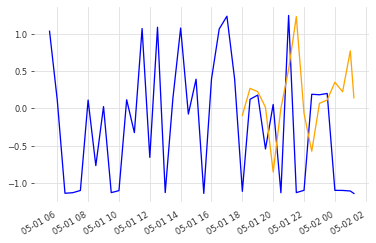

2022-07-17 23:02:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


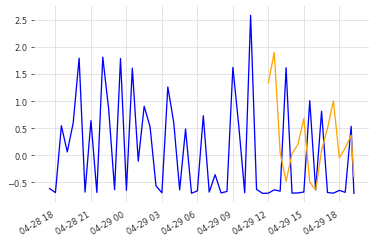

2022-07-17 23:02:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


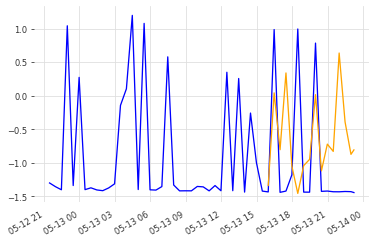

2022-07-17 23:02:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


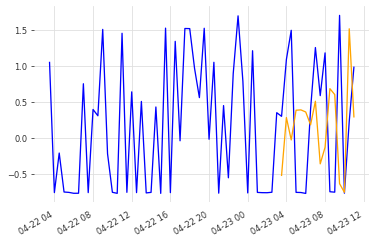

2022-07-17 23:02:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


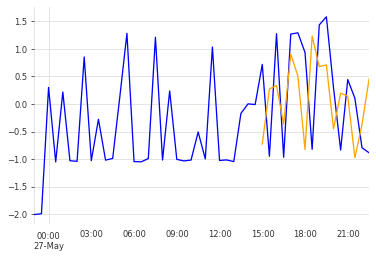

2022-07-17 23:02:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


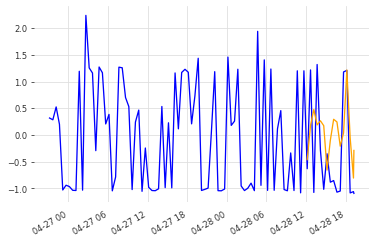

2022-07-17 23:02:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


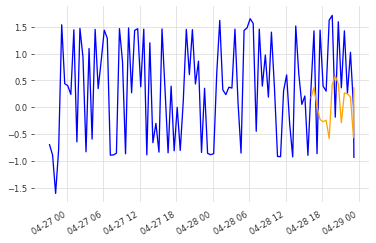

2022-07-17 23:02:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


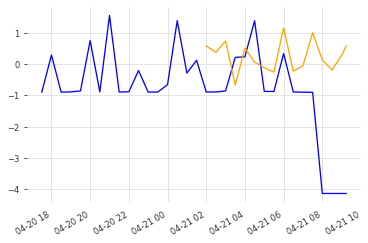

2022-07-17 23:02:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


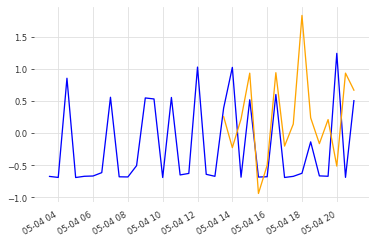

2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:02:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='nmstate-handler':
[TEST BENCH] Training time in seconds is             513.0830686092377
[TEST BENCH] Average mse over the test set is        1.3423996856770584
[TEST BENCH] Average precision over the test set is  0.4799303759062311
[TEST BENCH] Average recall over the test set is     0.5007737623431792
[TEST BENCH] Average F1 over the test set is         0.4835429362519149
[TEST BENCH] Average MASE over the test set is       1.0767702671704138
[TEST BENCH] Average MAPE over the test set is       385.407082898077
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='nmstate-handler'
[TEST BENCH] testing metric='container_mem', app='coredns'.
[TEST BENCH] Fetching data for metric='container_mem', app='coredns'.
[TEST BENCH] Subsampling data 

2022-07-17 23:03:33 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 79173 samples.
2022-07-17 23:03:33 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-17 23:03:33 pytorch_lightning.utilities.rank_zero INFO: Multiprocessing is handled by SLURM.
2022-07-17 23:03:33 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-07-17 23:03:33 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-17 23:03:33 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-17 23:03:33 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-17 23:03:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:03:33 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
----------------------------------

[TEST BENCH] Training took 292.4209198951721 seconds.
[TEST BENCH] Starting testing loop


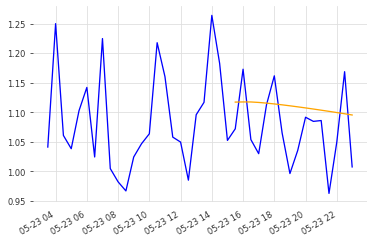

2022-07-17 23:08:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


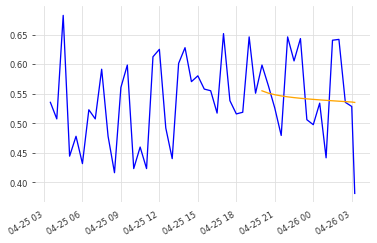

2022-07-17 23:08:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


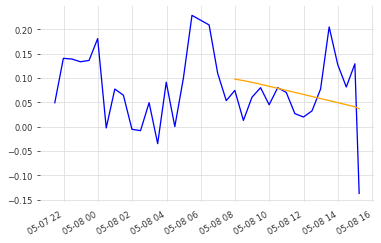

2022-07-17 23:08:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


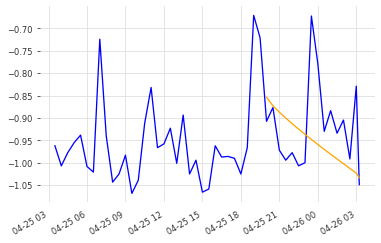

2022-07-17 23:08:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


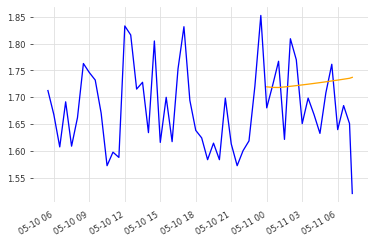

2022-07-17 23:08:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


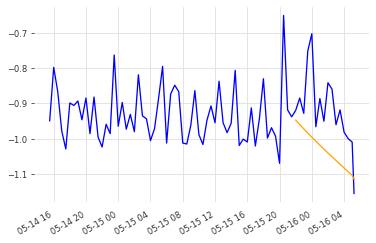

2022-07-17 23:08:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


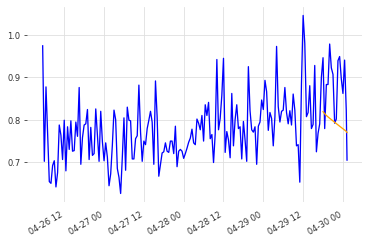

2022-07-17 23:08:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


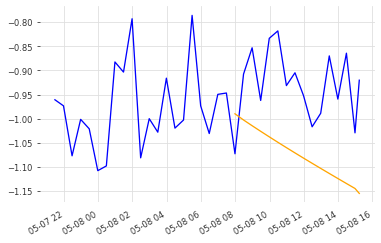

2022-07-17 23:08:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


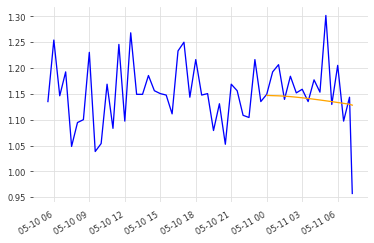

2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


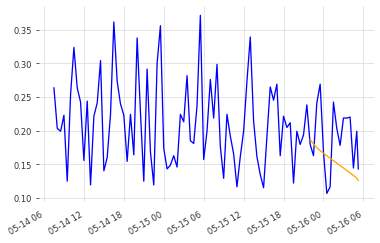

2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:08:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='coredns':
[TEST BENCH] Training time in seconds is             292.4209198951721
[TEST BENCH] Average mse over the test set is        0.023172879958516315
[TEST BENCH] Average precision over the test set is  0.08481759421284256
[TEST BENCH] Average recall over the test set is     0.11219873838664336
[TEST BENCH] Average F1 over the test set is         0.08185502344961354
[TEST BENCH] Average MASE over the test set is       1.2335645788112661
[TEST BENCH] Average MAPE over the test set is       81.33072027786518
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='coredns'
[TEST BENCH] testing metric='container_mem', app='keepalived'.
[TEST BENCH] Fetching data for metric='container_mem', app='keepalived'.
[TEST BENCH] Subsampling data from

2022-07-17 23:09:43 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 73515 samples.
2022-07-17 23:09:43 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-17 23:09:43 pytorch_lightning.utilities.rank_zero INFO: Multiprocessing is handled by SLURM.
2022-07-17 23:09:43 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-07-17 23:09:43 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-17 23:09:43 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-17 23:09:43 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-17 23:09:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-17 23:09:43 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
----------------------------------

In [ ]:
tb = tb.TestBench(
    class_to_test=lstm.DartsLSTMTester,
    path_to_data="./data/"
)
tb.run_training_and_tests()

Let's print information about the hardware we're running on, this is so we make sure that training time comparisons are fair.

In [ ]:
import torch
print(torch.cuda.get_device_name(0))
!nvidia-smi

Now we can make a table that summarizes the results:

| metric   | app         | training time | mse | precision | recall | F1  | MASE | MAPE |
| :-       | :-          | :-:           | :-: | :-:       | :-:    | :-: | :-:  | :-:  |